<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab09_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrices 

1. **Modelo de población de una especie de pajaros** 
Se estudiará un modelo de crecimiento de la poblacion para una especie de pájaros. En esta población se supone que el número de pajaros hembras es igual al número de machos.  Sea :
- $p_{j,n-1}$ la poblacion juvenil (inmadura) de hembras en el año (n-1) 
- $p_{a,n-1}$ el numero de hembras adultas en el mismo año.

Algunos de los pájaros jóvenes morirán  durante el año. Se suponen que cierta proporción de pájaros $\alpha$ de los pájaros jovenes sobrevivirán para llegar a adultos en la primavera del año $n$. Cada hembra que sobrevive prdocuce huevos en la primavera, los incupan y producen, en promedio, $k$ pájaros hembras jóvenes en al siguiente primavera. Los adultos también mueren y la proporcion de adultos que sobrevive de una primavera a la siguiente es $\beta$.

Un modelo para el crecimiento poblacional de pajaros 
\begin{equation}
p_{j,n} = kp_{a, n-1}
\end{equation}


\begin{equation}
p_{a,n} =\alpha p_{j,n-1} + \beta p_{a, n-1}
\end{equation}

Que puede ser escrita como ${\bf p_n}=A{\bf p_{n-1}}$, Siendo A la matrix definida en las ecuaciones anteriores, y ${\bf p_n}$ un vector. Para la evolución temporal se cumple que: 

- ${\bf p_1}=A{\bf p_{0}}$, ${\bf p_2}=A{\bf p_{1}}= A(A{\bf p_0})=A^2{\bf p_{0}}$ $...$ y asi sucesivamente. Entonces:

\begin{equation}
{\bf p_n} = A^n {\bf p_{0}}
\end{equation}


Supongamos que tenemos 10 hembras  (y 10 machos) adultos y no hay jovenes, la supongmaos que la matriz A viene dada por:

\begin{bmatrix} 
0 & 2 \\
0.3 & 0.5 
\end{bmatrix}

para la primera poblacion $p_{j,1}=20$, $p_{a,1}=5$, el total de hembras es 25 y la razón jovenes adultas es de 4 a 1. Muestre que la razon $p_{j,n}/p_{a,n}$ converge $1.88$,(como no se puede tener un número racional de pájaros,. aproxime siempre el resultados al menor entero).

- Para la  solución general del modelo del problema de valores y vetores propios
se tiene que:
\begin{equation}
p_n=\lambda_1^n\left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n \right]a_2 \vec{v}_2
\end{equation}

Asumiendo que $\lambda_2/ \lambda_1 < 1$, entonces $(\lambda_2/ \lambda_1)^n << 1$ cuando n crece.  Entonce spara n grande se cumple que:

donde $p_n=a_1\lambda_1^n\vec{v}_1$


donde:

${\bf p_0} = a_1 \vec{v}_1 + a_2 \vec{v}_2$, con $v_1$ y $v_2$ vectores propios de A


In [2]:
import numpy as np
import matplotlib.pyplot as plt

Para 20 años:
-Número de pájaros hembra jóvenes = 42
-Número de pájaros hembra adultas = 22
-La razón de jóvenes y adultas en el año 20 es 1.8797946193574473
----------------------------------------------------------


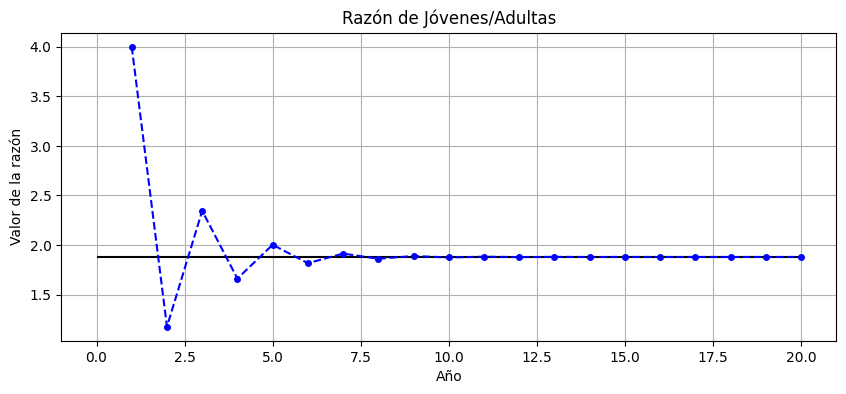

In [3]:
Pj0 = 0
Pa0 = 0
n = 20 #Años

A = np.array([[0,     2],
              [0.3, 0.5]])
P0 = np.array([0,10])


def Pn(n,N,array=0,Nrazon=0): #Definimos una función en donde introducimos n, y N de igual valor a n
  i = n
  Pi = np.linalg.matrix_power(A,i)@P0
  razon = Pi[0]/Pi[1]
  if n == N:
    array = np.zeros(n)
    Nrazon = razon
  else:
    array[i-1] = razon

  if n>0:
    return Pn(n-1,N,array,Nrazon)
  else:
    array[N-1] = Nrazon
    PN = np.linalg.matrix_power(A,N)@P0
    jovenes = int(PN[0])
    adultas = int(PN[1])
    return jovenes,adultas, Nrazon, array

P = Pn(n,n)

print(f'''Para {n} años:
-Número de pájaros hembra jóvenes = {P[0]}
-Número de pájaros hembra adultas = {P[1]}
-La razón de jóvenes y adultas en el año {n} es {P[2]}
----------------------------------------------------------''')

plt.figure(figsize=(10,4))
plt.title('Razón de Jóvenes/Adultas')
plt.hlines(1.88, 0, n, color='k')
plt.plot(np.array(range(n))+1,P[3],'bo--',markersize=4)
plt.xlabel('Año')
plt.ylabel('Valor de la razón')
plt.grid();





2. **Modelo de encriptación** 

Un proceso para encriptar un mensaje secreto es usar cierta matrix cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc y espacio=27), se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamano de la matriz de codigo, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje. 

La persona que debe recibir el mensaje conoce la matriz de codigo. El o ellla arrelgan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el numero de elementos en una fila conicide con el tamano de la matriz de codigo muplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588, 

la primera fila del mensaje es 47,49,-19,257,487

¿Cual es el mensaje?


In [4]:
#Matriz de código, la que utilizaremos para desencriptar el mensaje
A = np.array([[ 1,  2, -3,  4,  5],
              [-2, -5,  8, -8, -9],
              [ 1,  2, -2,  7,  9],
              [ 1,  1,  0,  6, 12],
              [ 2,  4, -6,  8, 11]])

#Mensaje encriptado
mensaje = np.array([47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588])

#Hallamos la inversa de la matriz de código
A_inv = np.linalg.inv(A)

num_filas = len(A)  #Número de filas de la matriz de código

#Matriz de ceros de la divición exacta de la longitud del mensaje encriptado entre el número de filas de la matriz de código
  #por el número de filas de la matriz de código. Queda una matriz 20/5 por 5, es decir, una matriz 4x5 de ceros.
mensaje_matriz = np.zeros((int(len(mensaje)/num_filas), num_filas)) 

#Convertimos el mensaje encriptado en forma matricial
contador = 0
for i in range(0, len(mensaje), num_filas):           #i va de 0 hasta la longitud del mensaje, de 5 en 5
  mensaje_matriz[contador] = mensaje[i:i+num_filas]   #A cada fila se le asignan los valores desde el respectivo i hasta el i+5 de los valores del mensaje
  contador += 1

decodificacion = ''                                  #Empezamos a escribir el mensaje, con un string inicialmente vacío
for fila in mensaje_matriz:                          
  multiplicacion = np.round(fila @ A_inv).astype(int) #A cada fila del mensaje se le multiplica por la inversa de la matriz
  for num in multiplicacion:                          #Cada número de esa multiplicación representa un caracter
    if num == 27:                   #Si el número es 27, es un espacio
      decodificacion += ' '         #Se asigna un espacio al string
    else:                                       
      decodificacion += chr(num+64)     
#Para el resto de números se hace la decodificación con chr(), de donde Python toma un código ASCII
#y devuelve el caracter correspondiente. En el código ASCII, las letras mayúsculas están en el rango de 65 a 90, por lo tanto, se suma 64

print(f'Mensaje decodificado:\n{decodificacion}')

Mensaje decodificado:
ARE YOU HAVING FUN  






3. **Diagonalización**.

Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.<br> 
a) Diagonalize $A$.<br> 

b) Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.<br>.
c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.<br> 
d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$


3. 

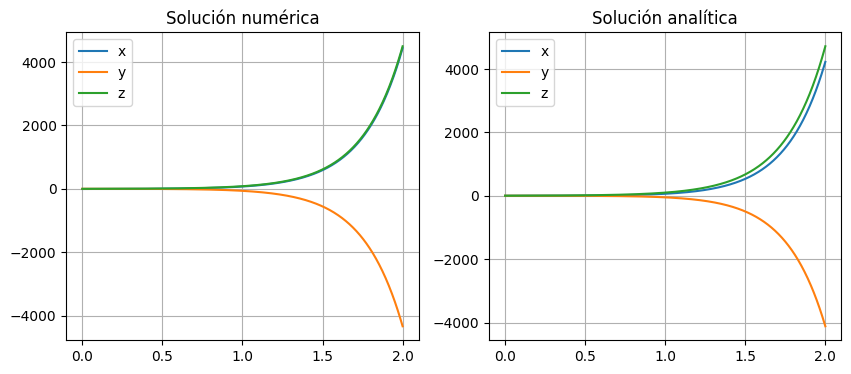

In [99]:
A = np.array([[2, -1,  1],
              [0,  3, -1],
              [2,  1,  3]])

#Condiciones iniciales
r0 = np.array([1,1,2])

#Función
def f(A,t):
  autoval, autovec = np.linalg.eig(A)
  U = autovec
  U_inv = np.linalg.inv(U)
  diag = np.real( U_inv @ A @ U)

  return np.real( U @ np.exp(diag*t) @ U_inv )

#Array del tiempo
t = np.linspace(0, 2, 1000)

#SOLUCIÓN ANALÍTICA
r = (1,1,2)
x0, y0, z0 = r
func_x = lambda t: x0*(1/2)*( np.exp(2*t)*(1 + np.exp(2*t) - 2*t) + y0*(-2*t*np.exp(2*t)) + z0*(np.exp(2*t)*(-1 + np.exp(2*t)))  )
func_y = lambda t: x0*(1/2)*( -np.exp(2*t)*(-1 + np.exp(2*t) - 2*t) + y0*(2*(t + 1)*np.exp(2*t)) + z0*(-np.exp(2*t)*(-1 + np.exp(2*t))) )
func_z = lambda t: x0*(1/2)*( np.exp(2*t)*(-1 + np.exp(2*t) + 2*t) + y0*(2*t*np.exp(2*t)) + z0*(np.exp(2*t)*(1 + np.exp(2*t))) )

#Soluciones x(t), y(t), z(t) numéricas
x = np.zeros(len(t))
y = np.zeros(len(t))
z = np.zeros(len(t))
for i in range(len(t)):
  r = (f(A,t[i])) @ r0
  x[i] = r[0]
  y[i] = r[1]
  z[i] = r[2]

#GRAFICACIÓN------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.set_title('Solución numérica')
ax1.plot(t,x,label='x')
ax1.plot(t,y,label='y')
ax1.plot(t,z,label='z')
ax1.grid()
ax1.legend()

ax2.set_title('Solución analítica')
ax2.plot(t,func_x(t), label='x')
ax2.plot(t,func_y(t), label='y')
ax2.plot(t,func_z(t), label='z')
ax2.grid()
ax2.legend();